In [24]:
import numpy as np
from scipy.integrate import quad

# Define the derivative function f'(x)
def f_prime(x):
    return 6*x + 2

# Define the limits of integration (from 0 to 2)
a = 0
b = 2

# Perform the integration
result, error = quad(f_prime, a, b)

print(f"Result of the integration: {result}")
print(f"Estimated error: {error}")


Result of the integration: 16.0
Estimated error: 1.7763568394002505e-13


In [1]:
# numerical integration

import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

print(result)

(1.1178179380783253, 7.866317250224184e-09)


In [3]:
# initial value problem (ivp)

from scipy.integrate import solve_ivp
from scipy.special import gamma

y1_0 = +1 / 3**(2/3) / gamma(2/3)
y0_0 = -1 / 3**(1/3) / gamma(1/3)

y0 = [y0_0, y1_0]
def func(t, y):
    return [t*y[1],y[0]]

t_span = [0, 4]
sol = solve_ivp(func, t_span, y0)
print("sol.t: {}".format(sol.t))

sol.t: [0.         0.10097672 1.04643602 1.91060117 2.49872472 3.08684827
 3.62692846 4.        ]


In [6]:
# optimization (minimization)

import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]


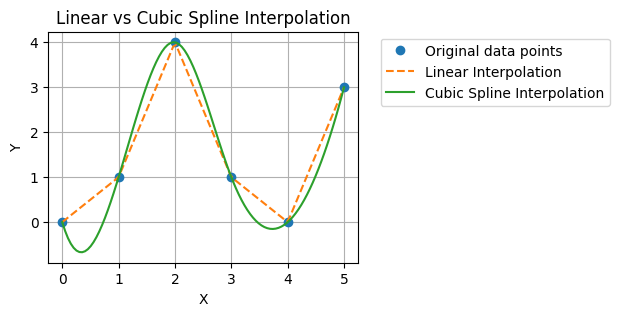

In [9]:
# interpolation

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Original data points
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0, 1, 4, 1, 0, 3])

# Linear interpolation
linear_interp = interp1d(x, y, kind='linear')

# Cubic spline interpolation
cubic_interp = interp1d(x, y, kind='cubic')

# Generate new x values for interpolation
x_new = np.linspace(0, 5, 100)

# Interpolated y values
y_linear = linear_interp(x_new)
y_cubic = cubic_interp(x_new)

# Plotting
plt.figure(figsize=(4, 3))
plt.plot(x, y, 'o', label='Original data points')
plt.plot(x_new, y_linear, label='Linear Interpolation', linestyle='--')
plt.plot(x_new, y_cubic, label='Cubic Spline Interpolation')

plt.title('Linear vs Cubic Spline Interpolation')
plt.xlabel('X')
plt.ylabel('Y')
#plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
# Signal processing

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Create a noisy signal
t = np.linspace(0, 1, 1000, endpoint=False)
signal_freq = 5  # Frequency of the original signal
noisy_signal = np.sin(2 * np.pi * signal_freq * t) + 0.5 * np.random.normal(size=t.shape)

# Create a low-pass filter
nyquist = 0.5
low_pass_cutoff = 0.1
b, a = signal.butter(4, low_pass_cutoff / nyquist, btype='low')

# Apply the filter to the noisy signal
filtered_signal = signal.filtfilt(b, a, noisy_signal)

# Plot the noisy and filtered signals
def plot_filter():
    plt.figure(figsize=(5, 3))
    plt.plot(t, noisy_signal, label='Noisy Signal', alpha=0.7)
    plt.plot(t, filtered_signal, label='Filtered Signal', linewidth=2)
    plt.title('Noisy vs. Filtered Signal')
    plt.xlabel('Time [seconds]')
    plt.ylabel('Amplitude')
    #plt.legend()
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.show()

plot_filter()


In [ ]:
# Signal processing (Gaussian filter)

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage, datasets


# Load an example image
image = np.asarray(datasets.ascent(), np.float64)

w = signal.windows.gaussian(51, 10.0)
image_new = signal.sepfir2d(image, w, w)

def plot_image(title, image):
    plt.figure()
    plt.imshow(image)
    plt.gray()
    plt.title(title)
    plt.show()

plot_gf('Original image', image)
plot_gf('Filtered image', image_new)

In [ ]:
# Linear Algebra

import numpy as np
from scipy import linalg

# Solving a System of Linear Equations
# Consider the equations: 2x + y = 5 and x + 3y = 10
# Represent the coefficients in a matrix A and the constants in a vector B
A = np.array([[2, 1], [1, 3]])
B = np.array([5, 10])
x = linalg.solve(A, B)
print("Solution to the system of linear equations:")
print("x =", x[0])
print("y =", x[1])

# Finding Eigenvalues and Eigenvectors of a Matrix
# Consider a 2x2 matrix
M = np.array([[4, 2], [1, 3]])
eigenvalues, eigenvectors = linalg.eig(M)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:", eigenvectors)

In [11]:
# Linear Algebra

import numpy as np
from scipy import linalg

# Solving a System of Linear Equations
# Consider the equations: x + 3y + 5z = 10, 2x + 5y + z = 8, and 2x + 3y + 8z = 3
# 
# Represent the coefficients in a matrix A and the constants in a vector B
A = np.array([[1, 3, 5], [2, 5, 1], [2, 3, 8]])
B = np.array([10, 8, 3])

x = linalg.solve(A, B)

print("Solution to the system of linear equations:")
print("x =", x[0])
print("y =", x[1])
print("z =", x[2])

Solution to the system of linear equations:
x = -9.280000000000001
y = 5.16
z = 0.76


In [18]:
# Statistics

import numpy as np
from scipy import stats

# Sample data
data = np.array([1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 9, 9])

# Compute mean
mean = np.mean(data)

# Compute median
median = np.median(data)

# Compute mode
mode = stats.mode(data, keepdims=True)
#mode = stats.mode(data)

# Display the results
print(f"Mean: {mean}")
print(f"Median: {median}")
#print(f"Mode: {mode.mode[0]}, Count: {mode.count[0]}")
print(f"Mode: {mode.mode[0]}, Count: {mode.count[0]}")


Mean: 5.666666666666667
Median: 5.5
Mode: 9, Count: 3


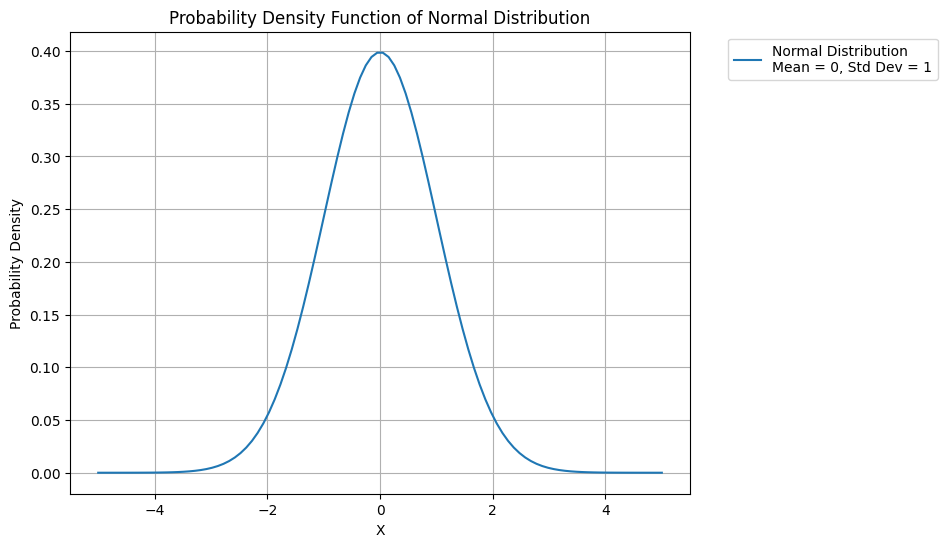

In [22]:
# Statistics: PDF of Normal Distribution

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create a range of x values
x = np.linspace(-5, 5, 100)

# Define the mean and standard deviation
mean = 0
std_dev = 1

# Calculate the PDF
pdf = norm.pdf(x, mean, std_dev)

# Plot the PDF
plt.figure(figsize=(8, 6))
plt.plot(x, pdf, label=f'Normal Distribution\nMean = {mean}, Std Dev = {std_dev}')

# Adding title and labels
plt.title('Probability Density Function of Normal Distribution')
plt.xlabel('X')
plt.ylabel('Probability Density')

# Show the grid and legend
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


In [23]:
# Statistics: hypothesis testing

import numpy as np
from scipy import stats

# Sample data for two groups
group1 = [68, 72, 76, 65, 70]
group2 = [78, 82, 80, 85, 90]

# Sample data for two groups
#group1 = [68, 72, 76, 65, 70]
#group2 = [69, 71, 77, 64, 69]

# Perform a t-test
t_stat, p_value = stats.ttest_ind(group1, group2)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis - There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis - There is no significant difference between the groups.")

Reject the null hypothesis - There is a significant difference between the groups.
